In [2]:
# Loading data
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

df_patch = pd.read_csv("experiments/patching_normal_study/sweep_results.csv")
df_agg = pd.read_csv("experiments/patching_aggregation_study/sweep_results.csv")

sns.set_theme(style="whitegrid", context="talk")

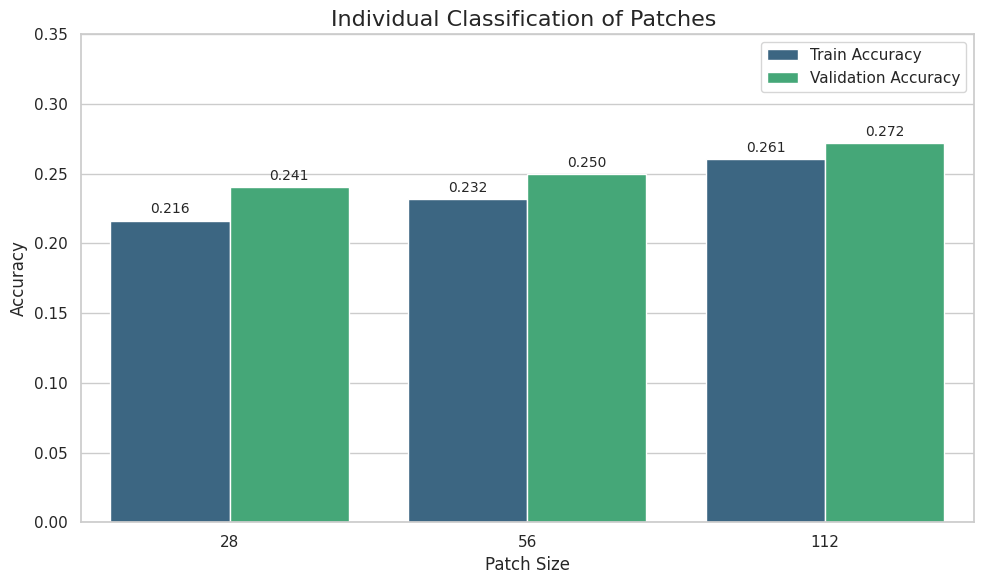

In [3]:
# Select relevant columns and rename for clarity
plot_df = df_patch[['patch_size', 'train_accuracy', 'best_val_accuracy']].copy()
plot_df.columns = ['Patch Size', 'Train Accuracy', 'Validation Accuracy']

# Melt for seaborn plotting
df_melted = plot_df.melt(id_vars='Patch Size', var_name='Metric', value_name='Accuracy')

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create barplot
ax = sns.barplot(data=df_melted, x='Patch Size', y='Accuracy', hue='Metric', palette='viridis')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

# Customize plot
plt.title('Individual Classification of Patches ', fontsize=16)
plt.xlabel('Patch Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 0.35) # Adjust ylim to fit labels
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

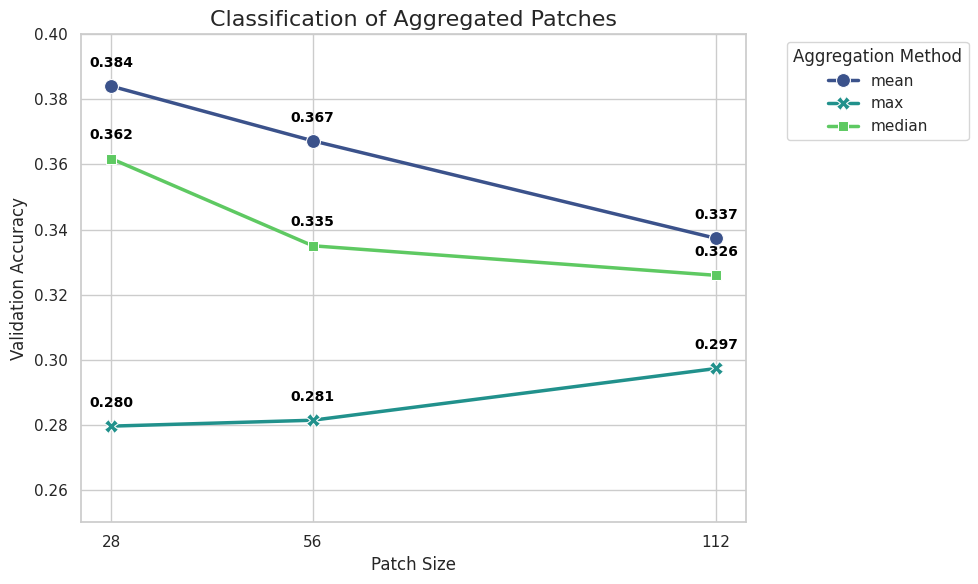

In [4]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create lineplot
ax = sns.lineplot(data=df_agg, x='patch_size', y='best_val_accuracy', hue='aggregation', style='aggregation', markers=True, dashes=False, palette='viridis', linewidth=2.5, markersize=10)

# Add labels on top of points
for i in range(df_agg.shape[0]):
    row = df_agg.iloc[i]
    plt.text(row.patch_size, row.best_val_accuracy + 0.005, f'{row.best_val_accuracy:.3f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Customize plot
plt.title('Classification of Aggregated Patches', fontsize=16)
plt.xlabel('Patch Size', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.xticks([28, 56, 112])
plt.ylim(0.25, 0.40) # Adjust ylim to fit labels
plt.legend(title='Aggregation Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

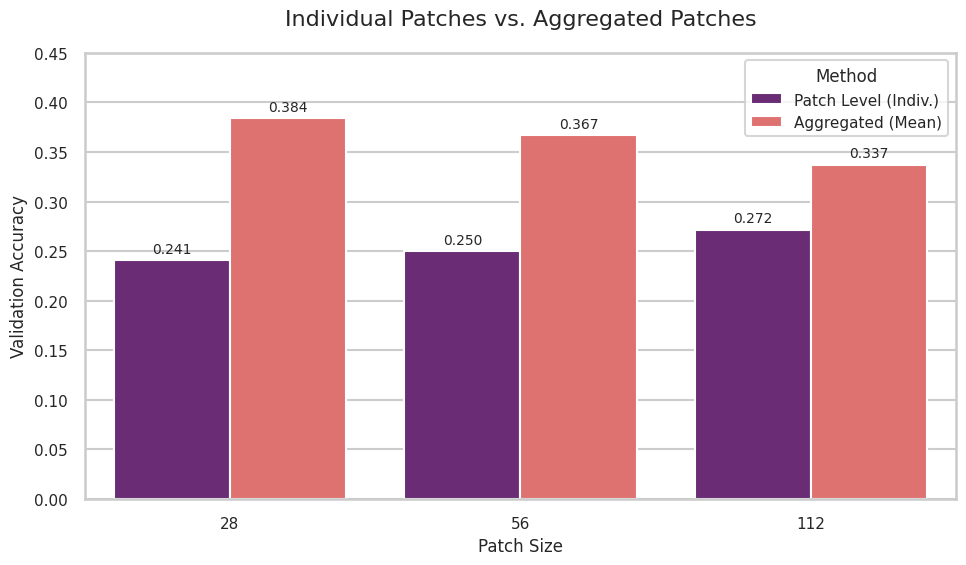

In [3]:
data_compare = [
    {"Method": "Patch Level (Indiv.)", "Patch Size": 28, "Accuracy": 0.2407},
    {"Method": "Aggregated (Mean)",    "Patch Size": 28, "Accuracy": 0.3841},
    {"Method": "Patch Level (Indiv.)", "Patch Size": 56, "Accuracy": 0.2499},
    {"Method": "Aggregated (Mean)",    "Patch Size": 56, "Accuracy": 0.3673},
    {"Method": "Patch Level (Indiv.)", "Patch Size": 112, "Accuracy": 0.2718},
    {"Method": "Aggregated (Mean)",    "Patch Size": 112, "Accuracy": 0.3373}
]
df_compare = pd.DataFrame(data_compare)

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
# Force Patch Size to be categorical string to avoid numerical axis issues
df_compare["Patch Size"] = df_compare["Patch Size"].astype(str)

ax3 = sns.barplot(x="Patch Size", y="Accuracy", hue="Method", data=df_compare, palette="magma")

# Consistent Font Sizes matching Plot 1
plt.title("Individual Patches vs. Aggregated Patches", fontsize=16, pad=20)
plt.ylim(0, 0.45)
plt.xlabel("Patch Size", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)

# Adjust Tick Label Sizes to match
ax3.tick_params(axis='both', which='major', labelsize=11)

# Add labels with consistent font size (10)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

plt.legend(title="Method", loc='upper right', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

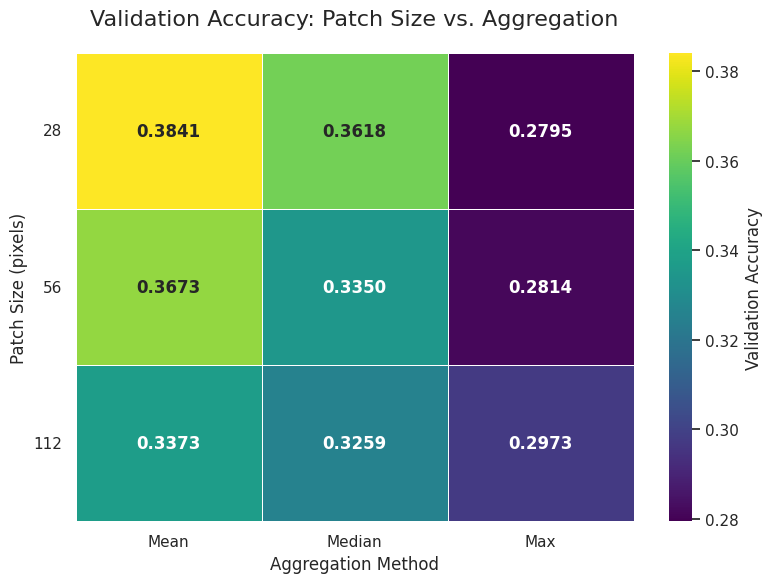

In [2]:
# Data for the matrix (Heatmap)
data_matrix = [
    {"Patch Size": 28, "Aggregation": "Mean", "Val Accuracy": 0.3841},
    {"Patch Size": 28, "Aggregation": "Max", "Val Accuracy": 0.2795},
    {"Patch Size": 28, "Aggregation": "Median", "Val Accuracy": 0.3618},
    {"Patch Size": 56, "Aggregation": "Mean", "Val Accuracy": 0.3673},
    {"Patch Size": 56, "Aggregation": "Max", "Val Accuracy": 0.2814},
    {"Patch Size": 56, "Aggregation": "Median", "Val Accuracy": 0.3350},
    {"Patch Size": 112, "Aggregation": "Mean", "Val Accuracy": 0.3373},
    {"Patch Size": 112, "Aggregation": "Max", "Val Accuracy": 0.2973},
    {"Patch Size": 112, "Aggregation": "Median", "Val Accuracy": 0.3259}
]

df_matrix = pd.DataFrame(data_matrix)

# Pivot the data for heatmap
heatmap_data = df_matrix.pivot(index="Patch Size", columns="Aggregation", values="Val Accuracy")

# Reorder columns for logical flow (Mean -> Median -> Max)
heatmap_data = heatmap_data[["Mean", "Median", "Max"]]

# Plotting
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Create Heatmap
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".4f", 
    cmap="viridis", 
    linewidths=.5, 
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={'label': 'Validation Accuracy'}
)

plt.title("Validation Accuracy: Patch Size vs. Aggregation", fontsize=16, pad=20)
plt.ylabel("Patch Size (pixels)", fontsize=12)
plt.xlabel("Aggregation Method", fontsize=12)

# Adjust y-axis labels to be horizontal
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()